# Análisis de Datos: Top 10 Productos y Empleados Más Rentables

## Objetivo
Despues de una exploracion de datos  con consultas SQL.
en este codigo, analizaremos los datos de la base de datos Northwind1 y determinaremos los 10 productos más rentables y los 10 empleados más efectivos.

## Configuración del Entorno
Para comenzar, importamos las bibliotecas necesarias: pandas para el manejo de datos, sqlite3 para la conexión con la base de datos y matplotlib para la visualización.

In [1]:


import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt


# Conexión a la base de datos

In [2]:
conn = sq.connect("/kaggle/input/northwind/Northwind1 - copia.db")

# Consulta para obtener los 10 productos más rentables

In [3]:
query = '''
SELECT ProductName, SUM(Price * Quantity ) as Revenue 
FROM OrderDetails od 
JOIN Products p ON p.ProductID = od.ProductID 
GROUP BY od.ProductID 
ORDER BY Revenue DESC 
LIMIT 10
'''

# Lectura de los datos y creación del gráfico de barras

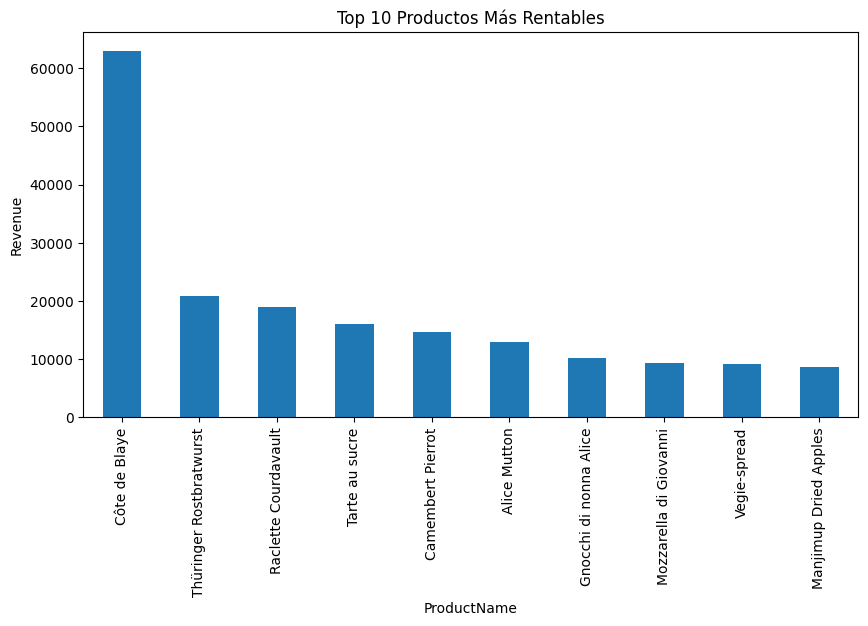

In [4]:
top_products = pd.read_sql_query(query, conn)
top_products.plot(x="ProductName", y="Revenue", kind="bar", figsize=(10, 5), legend=False)

#configuracion del grafico
plt.title("Top 10 Productos Más Rentables")
plt.xlabel("ProductName")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()


# Consulta para obtener los 10 empleados más efectivos

In [5]:
query2 = '''
SELECT FirstName || " " || LastName as Employee, COUNT(*) as Total_Vendido 
FROM Orders o 
JOIN Employees e ON e.EmployeeID = o.EmployeeID 
GROUP BY o.EmployeeID 
ORDER BY Total_Vendido DESC
'''

# Lectura de los datos y creación del gráfico de barras

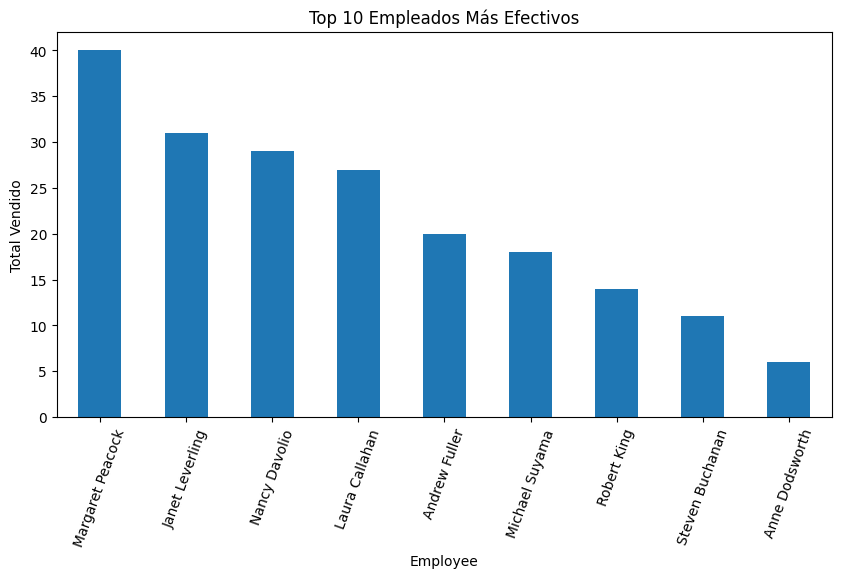

In [6]:
top_employees = pd.read_sql_query(query2, conn)
top_employees.plot(x="Employee", y="Total_Vendido", kind="bar", figsize=(10, 5), legend=False)

# configuracion de grafico
plt.title("Top 10 Empleados Más Efectivos")
plt.xlabel("Employee")
plt.ylabel("Total Vendido")
plt.xticks(rotation=70)
plt.show()

### Cierre de la conexión a la base de datos

In [7]:
conn.close()

## Conclusiones
Con estos análisis, hemos identificado los productos más rentables y los empleados más efectivos en términos de ventas. Esta información puede ser útil para la toma de decisiones comerciales y estratégicas.